# Date and Times in Python

Most of the content presented in this notebook is inspired by the following content.

[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

[Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)

# Datetime Module

In [1]:
## import datetime module
from datetime import datetime

[Datetime source code](https://github.com/python/cpython/blob/3.10/Lib/datetime.py)

[Datetime Python Documentation](https://docs.python.org/3/library/datetime.html)

Datetime Arguments: [Reference to the documentation](https://docs.python.org/3/library/datetime.html#datetime.datetime)

Depending on can be either aware or naive depending on use of timezones. Aware object can locate itself relative to other aware objects while naive object do not contain enough information to unambiguously locate itself relative to other date/time objects. [Datetime 'Aware` and `naive` object categories](https://docs.python.org/3/library/datetime.html#aware-and-naive-objects)


See documentation section on "strftime() and strptime() Format Codes." Some importat format codes:

Directive          |  Meaning
-------------------|------------------
%a                 |  Weekday as locale’s abbreviated name.
%A                 | Weekday as locale’s full name.
%w                 | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
%d                 | Day of the month as a zero-padded decimal number.
%b                 | Month as locale’s abbreviated name.
%B                 | Month as locale’s full name.
%m                 | Month as a zero-padded decimal number.
%y                 | Year without century as a zero-padded decimal number.
%Y                 | Year with century as a decimal number.
%H                 | Hour (24-hour clock) as a zero-padded decimal number.
%I                 | Hour (12-hour clock) as a zero-padded decimal number.
%p                 | Locale’s equivalent of either AM or PM.
%M                 | Minute as a zero-padded decimal number.
%S                 | Second as a zero-padded decimal number.
%j                 | Day of the year as a zero-padded decimal number.

In [2]:
## now we can create a datetime object
today = datetime(year = 2021, month = 10, day = 28)
today.strftime('%A')

'Thursday'

In [3]:
datetime_now = datetime.now()
print(datetime_now) # Time at the moment the cell ran.
print(datetime_now.strftime('%a')) # Weekday as locale’s abbreviated name.
print(datetime_now.strftime('%A')) # Weekday as locale’s full name.
print(datetime_now.strftime('%w')) # Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
print(datetime_now.strftime('%d')) # Day of the month as a zero-padded decimal number.
print(datetime_now.strftime('%b')) # Month as locale’s abbreviated name.
print(datetime_now.strftime('%B')) # Month as locale’s full name.
print(datetime_now.strftime('%Y')) # Year with century as a decimal number.

2022-11-21 19:51:46.404345
Mon
Monday
1
21
Nov
November
2022


In [4]:
# Strtime works similar to print function.
datetime_now.strftime('Today is %A %B %d, %Y.')

'Today is Monday November 21, 2022.'

In [5]:
type(datetime_now)
# Note that datetime object/data type.

datetime.datetime

In [6]:
# Converts a string to a datetime as specified in the format.
string_to_date = datetime.strptime('06-01-2001', '%m-%d-%Y').date() 
string_to_date

datetime.date(2001, 6, 1)

# Dateutil Library
[Dateutil - Pypi](https://pypi.org/project/python-dateutil/)

In [7]:
## We could also use dateutil library to parse time and date
## Note that dateutil is a third-party library.
## let's import parser from dateutil.

from dateutil import parser

In [8]:
## Parser allow us to convert strings to datetime.datetime objects
parser.parse('July 4th of 2021')
## Parser has a parse method to parse strings

datetime.datetime(2021, 7, 4, 0, 0)

In [9]:
parser.parse('07/04/2021')

datetime.datetime(2021, 7, 4, 0, 0)

Note that the result is `datetime` object. Parser also recognizes other date formats.

In [10]:
print(parser.parse('4th of July --- 2021')) # This prints the date and time if any was included.
parser.parse('4th of July --- 2021') # This returns the datetime and parameters

2021-07-04 00:00:00


datetime.datetime(2021, 7, 4, 0, 0)

In [11]:
parser.parse('2021, July 4')

datetime.datetime(2021, 7, 4, 0, 0)

In [12]:
parser.parse('2021/07/04')

datetime.datetime(2021, 7, 4, 0, 0)

In [13]:
parser.parse('28th Oct. 2021')

datetime.datetime(2021, 10, 28, 0, 0)

# Working with `datetime` object

In [14]:
## let's create a datetime object let's say my birthday 03-15-1982
my_birthday = datetime(year= 1982, month = 3, day =15)

In [15]:
## We can check the day of the week
my_birthday.strftime('%A')

'Monday'

In [16]:
## note that using .strftime method we can convert the time into any string format.
my_birthday.strftime('(%a)-%d/%B--%Y')

'(Mon)-15/March--1982'

[Reference to `strfformat` directives](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

# Numpy "datetime64" type

Numpy also has a datetime data type which can be used with vectorized operations in arrays.

[Numpy-Datetime Documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html) 

[All available datetime-units](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)

In [17]:
import numpy as np

In [18]:
## note that in the case of working with a lot dates and time 
## this is the compact way to store data
date = np.array(['2021-10-28'], dtype = 'datetime64')
## use np.array with dtype argument to create today as np.datetime64 object
date

array(['2021-10-28'], dtype='datetime64[D]')

In [19]:
## Note that we can easily apply vectorized operations.
date + np.arange(10) # Np.arrange produces integers from 0 to 9.

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-05', '2021-11-06'], dtype='datetime64[D]')

Note that numpy automatically choosed 'D' as the unit.

In [20]:
## We can select second as the unit and let's see the difference
date = np.array(['2021-10-28'], dtype = 'datetime64[Y]')

date + np.arange(12)

array(['2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032'], dtype='datetime64[Y]')

## Date and Times in Pandas

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[Pandas Timestamp Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)

In [21]:
## let's import pandas
import pandas as pd

In [22]:
# One data structure used in pandas using is Timestamp
today = pd.Timestamp(year= 2022, month = 11, day = 21)

In [23]:
pd.Timestamp(ts_input = 10000, unit='D') # Units D = days. 10,000 days from reference date/time.

Timestamp('1997-05-19 00:00:00')

In [24]:
pd.Timestamp(ts_input = 0, unit='D') # Reference date and time for ts_input is 1970-01-01.

Timestamp('1970-01-01 00:00:00')

In [25]:
pd.Timestamp(ts_input = -1, unit='s') # Unit s = seconds. -1 second from reference date/time.

Timestamp('1969-12-31 23:59:59')

In [26]:
today.day_name()

'Monday'

In [27]:
today.strftime('%A')

'Monday'

In [28]:
# We can also use pd.to_datetime to create a timestamp.
pd.to_datetime('Oct. 28th 2021')

Timestamp('2021-10-28 00:00:00')

In [ ]:
# Pandas uses both datetime module and numpy.datetime64 data dtype
# We can use some of the methods used in these modules. 
# There are also some additional methods that are very hadny when you analyze data.

[What is Ethereum](https://ethereum.org/en/eth/)

In [29]:
## let's consider the following example
data_url ='https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/ETH-1.csv'
df = pd.read_csv(data_url)

In [30]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [33]:
# Run this to see that it fails
#pd.to_datetime(df.Date)

In [ ]:
# Note that in this case it is not straightforward to convert strings to datetime
# Let's try pd.to_datetime

In [34]:
df.Date.iloc[1]

'2020-03-13 07-PM'

In [35]:
## We can use the format parameter to give the format of the string use pd.to_datetime together with format argument.
pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p').iloc[1]

Timestamp('2020-03-13 19:00:00')

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[strftime - strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [36]:
# We can use parse_dates parameter and infer_datetime_format when pd.read_csv.
pd.read_csv(data_url, parse_dates = ['Date'], infer_datetime_format= True)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [37]:
# Another way we can also define a function to define format.
# In this case we need to pass a parser to date_parser argument define my_time_parser 
# This takes a string and return pd.to_datetime 
def my_time_parser(date):
    return pd.to_datetime(date, format = '%Y-%m-%d %I-%p')

# Could have also used datetime.strptime mehtod

# Read_csv but this time pass my_time_parser to date_parser argument
df1 = pd.read_csv(data_url, parse_dates= ['Date'], date_parser= my_time_parser)

In [38]:
# Function with adition function.
def my_addition(a, b):
    return a+b

my_addition(3, 5)

8

In [39]:
# The above function could also be redefined using lambda functions.
f = lambda a,b: a+b

# Testing the function.
f(3,5)

8

In [40]:
# We could directly pass a lambda function too in datetime.
df1 = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/ETH-1.csv', 
                  parse_dates= ['Date'], 
                  date_parser = lambda date: datetime.strptime(date, '%Y-%m-%d %I-%p'))
df1.Date

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [41]:
# Note that each entry is an timestamp and can use the timestamp methods.
df1.Date.iloc[2].weekofyear # Week of year for date in index 2.

11

In [42]:
## We can use .dt class to be able to access datetime methods.
df1.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [43]:
# Check min of date
df1.Date.min()

Timestamp('2017-07-01 11:00:00')

In [44]:
# Check max of date
df1.Date.max()

Timestamp('2020-03-13 20:00:00')

In [45]:
# Note that results of operations are timedelta type
df1.Date.max() - df1.Date.min()

Timedelta('986 days 09:00:00')

In [46]:
df1.Date.min() - df1.Date.max()

Timedelta('-987 days +15:00:00')

In [47]:
# We can perform operations accross a dataframe column.
# Note again that we get timedelta objects when we check the difference of two timestamps.
df1.Date - df1.Date.min()

0       986 days 09:00:00
1       986 days 08:00:00
2       986 days 07:00:00
3       986 days 06:00:00
4       986 days 05:00:00
               ...       
23669     0 days 04:00:00
23670     0 days 03:00:00
23671     0 days 02:00:00
23672     0 days 01:00:00
23673     0 days 00:00:00
Name: Date, Length: 23674, dtype: timedelta64[ns]

In [48]:
# We can create a feature with the time_delta
df1['time_delta'] = df1.Date - df1.Date.min()
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume,time_delta
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,986 days 09:00:00
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,986 days 08:00:00
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,986 days 07:00:00
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,986 days 06:00:00
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,986 days 05:00:00


### Indexing by time

When you are working with time data it is generally good idea to index your dataframe with the time.

In [49]:
# let's set the index key as 'Date' column
df1.set_index(keys = 'Date', inplace= True)

In [50]:
df1.sort_index(inplace = True)

In [51]:
df1.head()

,Symbol,Open,High,Low,Close,Volume,time_delta
Date,,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87,0 days 00:00:00
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87,0 days 01:00:00
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99,0 days 02:00:00
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.0,265.74,1702536.85,0 days 03:00:00
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.0,272.57,1500282.55,0 days 04:00:00


In [52]:
## Advantage of working with a dataframe index with DatetimeIndex
df1.head()
## now we can slice our data very easly
## let's get all the rows from 2019-01 to 2019-02.
df1['2019-01': '2019-02']

,Symbol,Open,High,Low,Close,Volume,time_delta
Date,,,,,,,
2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,548 days 13:00:00
2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,548 days 14:00:00
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,548 days 15:00:00
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,548 days 16:00:00
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,548 days 17:00:00
...,...,...,...,...,...,...,...
2019-02-28 19:00:00,ETHUSD,136.00,137.50,134.17,135.57,1208793.69,607 days 08:00:00
2019-02-28 20:00:00,ETHUSD,135.57,135.60,134.37,134.99,1023140.26,607 days 09:00:00
2019-02-28 21:00:00,ETHUSD,134.99,135.37,134.86,135.13,330511.15,607 days 10:00:00


In [53]:
# Another way of indexing a dataframe with DatetimeIndex is when you create the dataframe
index = pd.DatetimeIndex(['2018-11-24', '2019-9-25', '2020-10-21', '2021-10-27', '2021-10-28'])
data = pd.Series([2,3,5,7,11], index= index)
data

2018-11-24     2
2019-09-25     3
2020-10-21     5
2021-10-27     7
2021-10-28    11
dtype: int64

## Resampling

### Resample vs Asfreq

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 

In [55]:
## First make sure that you sort your index 
## Let's create a variable open for the opening values of the Ethereum
price_open = df1.Open
price_open
# Be careful, 'open' is also a function within python and should not be used as variable.

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
                        ...  
2020-03-13 16:00:00    124.85
2020-03-13 17:00:00    124.08
2020-03-13 18:00:00    124.47
2020-03-13 19:00:00    119.51
2020-03-13 20:00:00    129.94
Name: Open, Length: 23674, dtype: float64

[Date Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [56]:
## here use resample with 'BA' offset
price_open.resample('BA').mean()

Date
2017-12-29    345.722109
2018-12-31    483.887252
2019-12-31    180.763469
2020-12-31    196.696462
Freq: BA-DEC, Name: Open, dtype: float64

In [57]:
## here use asfreq method with 'BA' offset and compare
price_open.asfreq('BA')

Date
2017-12-29 11:00:00    715.00
2018-12-31 11:00:00    135.51
2019-12-31 11:00:00    131.32
Freq: BA-DEC, Name: Open, dtype: float64

(array([17532., 17652., 17775., 17897., 18017., 18140., 18262., 18383.,
        18506., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

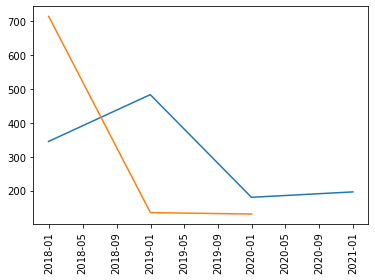

In [58]:
## Plot them in the same plot
plt.plot(price_open.resample('BA').mean())
plt.plot(price_open.asfreq('BA'))
plt.xticks(rotation =90)

# Rolling Windows

[Moving Average](https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db)

[Rolling Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

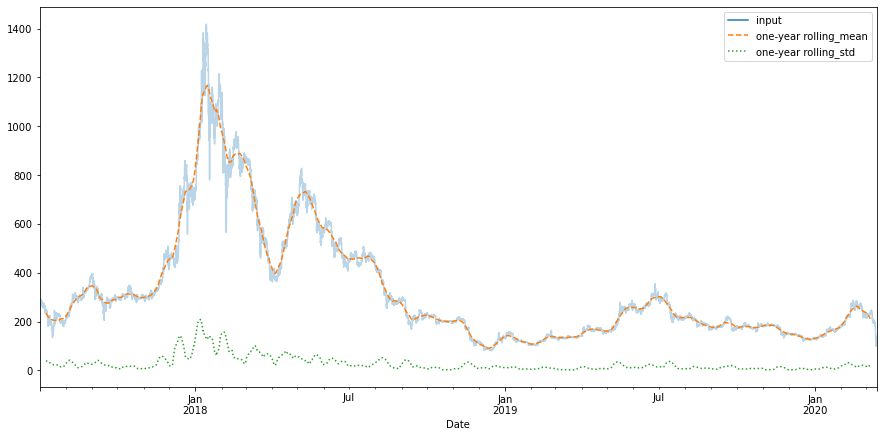

In [59]:
rolling = price_open.rolling(365, center =True)

data = pd.DataFrame({'input': price_open,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.3)

In [60]:
price_open

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
                        ...  
2020-03-13 16:00:00    124.85
2020-03-13 17:00:00    124.08
2020-03-13 18:00:00    124.47
2020-03-13 19:00:00    119.51
2020-03-13 20:00:00    129.94
Name: Open, Length: 23674, dtype: float64

In [61]:
# Shift the price at open by -1 day. Note the index 0 above gets removed and last date creates a NaN.
one_day_shift = price_open.shift(-1)
one_day_shift

Date
2017-07-01 11:00:00    275.01
2017-07-01 12:00:00    274.83
2017-07-01 13:00:00    268.79
2017-07-01 14:00:00    265.74
2017-07-01 15:00:00    272.57
                        ...  
2020-03-13 16:00:00    124.08
2020-03-13 17:00:00    124.47
2020-03-13 18:00:00    119.51
2020-03-13 19:00:00    129.94
2020-03-13 20:00:00       NaN
Name: Open, Length: 23674, dtype: float64

In [62]:
two_days_shift = price_open.shift(-2)
two_days_shift

Date
2017-07-01 11:00:00    274.83
2017-07-01 12:00:00    268.79
2017-07-01 13:00:00    265.74
2017-07-01 14:00:00    272.57
2017-07-01 15:00:00    268.00
                        ...  
2020-03-13 16:00:00    124.47
2020-03-13 17:00:00    119.51
2020-03-13 18:00:00    129.94
2020-03-13 19:00:00       NaN
2020-03-13 20:00:00       NaN
Name: Open, Length: 23674, dtype: float64

# Exercise

[Exercise from Python Data Science Handbook: Visualizing Seattle Bicycle Counts](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts)

[Blog on Seattle Really Seeing an Uptick in Cycling](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)

# Notebook End